In [1]:
import numpy as np
from gwbench import network

/home/sreelakshmi/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## User Choices

#### choose the desired detectors

In [2]:

network_spec = ['aLIGO_H','aLIGO_L','aLIGO_V']

#### initialize the network with the desired detectors

In [3]:
net = network.Network(network_spec)

#### choose the desired waveform 

In [4]:
wf_model_name = 'lal_bbh_jframe'

#### pass the chosen waveform to the network for initialization

In [5]:
net.set_wf_vars(wf_model_name=wf_model_name)

#### pick the desired frequency range

In [6]:
f = np.arange(5.,1024,2**-4)
print(len(f))

16304


#### set the injection parameters

In [7]:


# inj_params = {
#     'Mc':          27.9,
#     'eta':         0.249,
#     'a_1':         0.34,
#     'a_2':         0.34,
#     'tilt_1':      1e-5,
#     'tilt_2':      1e-5,
#     'phi_12':      1e-5,
#     'phi_jl':      1e-5,
#     'theta_jn':    0.,
#     'DL':          200,
#     'tc':          0,
#     'phic':        0,
#     'approximant': 'IMRPhenomXPHM',
#     'ra':          np.pi/2,
#     'dec':         np.pi/4,
#     'psi':         np.pi/4,
#     'gmst0':       0
#     }

In [8]:
inj_params = {
    'Mc':          27.9,
    'eta':         0.249,
    'a_1':         1e-5,
    'a_2':         1e-5,
    'tilt_1':      1e-5,
    'tilt_2':      1e-5,
    'phi_12':      0.,
    'phi_jl':      0.,
    'theta_jn':    0.,
    'DL':          470.,
    'tc':          0.,
    'phic':        0.,
    'approximant': 'IMRPhenomXP',
    'ra':          np.pi/4,
    'dec':         np.pi/4,
    'psi':         np.pi/4,
    'gmst0':       0.
}

In [9]:

from gwbench import basic_relations
tot_mass = basic_relations.M_of_Mc_eta(27.9, 0.249)
print(tot_mass)
m1,m2 = basic_relations.m1_m2_of_M_eta(tot_mass,0.249)
print(m1,m2)
q= m1/m2
k= q*((4*q)+3)/(4+(3*q))
print(k)

64.25169587301812
34.15766496138084 30.09403091163728
1.1557284258714626


In [10]:
deriv_symbs_string = 'Mc eta a_1 tilt_1 DL tc phic'

#### assign which parameters to convert to cos or log versions

In [11]:
conv_cos = ('tilt_1')
conv_log = ('Mc')  ##conv_cos= conv_cos, conv_log= conv_log,

#### choose whether to take Earth's rotation into account

In [12]:
use_rot = 0

#### pass all these variables to the network

In [13]:
net.set_net_vars(
    f=f, inj_params=inj_params,
    deriv_symbs_string=deriv_symbs_string,
    conv_cos= conv_cos, conv_log= conv_log,
    use_rot=use_rot
    )

## GW benchmarking

#### compute the WF polarizations

In [14]:
net.calc_wf_polarizations()
f0=net.hfc
print(len(f0))
#print(f0)

2023-10-26 17:52:39,565 - Network - INFO : Polarizations calculated.


16304


#### compute the WF polarizations and their derivatives

In [15]:
net.calc_wf_polarizations_derivs_num()
#f1=net.del_hfpc
#print(len(f1))
#print(f1)

#for key in f1.keys():
   #print(key)


2023-10-26 17:52:39,593 - Network - INFO : Calculate numeric derivatives of polarizations.
2023-10-26 17:52:39,649 - Network - INFO : Polarizations calculated.
2023-10-26 17:52:45,159 - Network - INFO : Numeric derivatives of polarizations calculated.


In [16]:
f1=net.del_hfpc
print(len(f1))
print(f1)

for key in f1.keys():
   print(key)

14
{'del_log_Mc_hfp': array([-2.87432655e-22-2.87436125e-22j, -8.00278197e-21-9.53976823e-22j,
       -1.45019644e-20-9.31010936e-21j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_log_Mc_hfc': array([-2.87434390e-22+2.87434390e-22j, -9.53976823e-22+8.00278197e-21j,
       -9.31010936e-21+1.45019644e-20j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_eta_hfp': array([-3.45921816e-23-3.45921816e-23j,  1.09365989e-21+6.50430597e-23j,
        1.85663361e-21+1.07849002e-21j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_eta_hfc': array([-3.45921816e-23+3.45921816e-23j,  6.50430597e-23-1.09365989e-21j,
        1.07849007e-21-1.85663369e-21j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j])

#### setup antenna patterns, location phase factors, and PSDs

In [17]:
net.setup_ant_pat_lpf_psds()

2023-10-26 17:52:45,260 - Network - INFO : PSDs loaded.
2023-10-26 17:52:45,268 - Network - INFO : Antenna patterns and LPFs loaded.


#### compute the detector responses

In [18]:
net.calc_det_responses()

2023-10-26 17:52:45,413 - Network - INFO : Detector responses calculated.


#### 
compute the detector responses and their derivatives

In [19]:
net.calc_det_responses_derivs_num()


2023-10-26 17:52:45,422 - Network - INFO : Calculate numeric derivatives of detector responses.
2023-10-26 17:52:45,424 - Network - INFO :    aLIGO_H
2023-10-26 17:52:48,155 - Network - INFO :    aLIGO_L
2023-10-26 17:52:50,805 - Network - INFO :    aLIGO_V
2023-10-26 17:52:53,527 - Network - INFO : Numeric derivatives of detector responses calculated.


In [20]:

h=net.detectors[2].del_hf
print(h)

{'del_log_Mc_hf': array([-3.08333927e-23+1.01902006e-22j, -5.47251118e-22+3.47761180e-22j,
       -4.09795335e-22-1.34631191e-21j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_eta_hf': array([-1.10419346e-23+3.64921476e-23j,  8.65368977e-23-1.42674202e-22j,
        1.41802964e-22+2.92166029e-22j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_a_1_hf': array([-1.33968700e-24+4.42755031e-24j,  1.91206133e-23-2.03810782e-23j,
        1.71592320e-23+4.88701687e-23j, ...,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j]), 'del_cos_tilt_1_hf': array([ 1.67110188e-24+5.05648447e-25j, -6.42012669e-19+6.42725270e-19j,
        2.89643496e-23+7.73436299e-23j, ...,
       -0.00000000e+00+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j]), '

#### calculate the network and detector SNRs

In [21]:
net.calc_snrs()
print(net.detectors[0].snr)
print(net.detectors[1].snr)
print(net.detectors[2].snr)
net_opt_snr = np.linalg.norm([net.detectors[0].snr, net.detectors[1].snr, net.detectors[2].snr])
print(net_opt_snr)

2023-10-26 17:52:53,598 - Network - INFO : SNRs calculated.


4.699393124793044
7.405778707886583
77.4746821975494
77.96958532416866


#### 
calculate the network and detector Fisher matrices, condition numbers, covariance matrices, error estimates, and inversion errors

In [22]:
net.calc_errors()

2023-10-26 17:52:53,639 - Network - INFO : Calculate errors (Fisher & cov matrices).
2023-10-26 17:52:53,643 - Network - INFO :    aLIGO_H
2023-10-26 17:52:53,729 - Network - INFO :    aLIGO_L
2023-10-26 17:52:53,828 - Network - INFO :    aLIGO_V
2023-10-26 17:52:53,903 - Network - INFO : Errors calculated.


#### calculate the 90%-credible sky area (in deg)

In [23]:
net.calc_sky_area_90()

2023-10-26 17:52:53,910 - Network - WARNING : calc_sky_area_90: tag = network - Nothing done due to missing of either RA or COS_DEC (DEC) errors.


In [24]:
h_ul=net.detectors[2].hf
print(len(h_ul))
A_ul=np.abs(h_ul)
phi_ul= np.angle(h_ul)

16224


In [25]:
f2=net.detectors[2].del_hf
print(len(f2))
#print(f2)
key_list = list(f2.keys()) # returns a list containing the derivatives for each parameter.
print(key_list)
#for i in range(len(key_list)):
#print(f2[key_list[0]])
print(len(f2[key_list[4]]))
a=f2[key_list[2]]
print(a[:10])

7
['del_log_Mc_hf', 'del_eta_hf', 'del_a_1_hf', 'del_cos_tilt_1_hf', 'del_DL_hf', 'del_tc_hf', 'del_phic_hf']
16224
[-1.33968700e-24+4.42755031e-24j  1.91206133e-23-2.03810782e-23j
  1.71592320e-23+4.88701687e-23j -8.02601150e-23-2.80862962e-24j
  4.91772083e-23-9.76461785e-23j  9.05084993e-23+9.79838471e-23j
 -1.46504738e-22+6.63246912e-23j -2.23581881e-23-1.81980717e-22j
  2.05881457e-22+2.81704824e-23j -8.23683233e-23+2.15574469e-22j]


In [26]:
f3=net.detectors[2].fisher
print(f3)

[[ 5.51400112e+08 -3.25783880e+08 -5.06597273e+07  6.24160088e+09
  -9.85229758e+00 -9.81786067e+08  1.80433100e+06]
 [-3.25783880e+08  1.95583531e+08  3.02746613e+07 -3.64906915e+09
  -1.98747059e+01  6.24578854e+08 -1.05490865e+06]
 [-5.06597273e+07  3.02746613e+07  4.69480771e+06 -5.68517511e+08
  -1.60292406e+00  9.47313818e+07 -1.64385648e+05]
 [ 6.24160088e+09 -3.64906915e+09 -5.68517511e+08  1.22210628e+11
  -2.07558258e+01 -1.07797363e+10  2.07602211e+07]
 [-9.85229758e+00 -1.98747059e+01 -1.60292406e+00 -2.07558258e+01
   3.45881202e-02 -2.35802820e-02 -5.78152693e-04]
 [-9.81786067e+08  6.24578854e+08  9.47313818e+07 -1.07797363e+10
  -2.35802820e-02  2.58773564e+09 -3.10481720e+06]
 [ 1.80433100e+06 -1.05490865e+06 -1.64385648e+05  2.07602211e+07
  -5.78152693e-04 -3.10481720e+06  6.00233263e+03]]


In [27]:
u,v = np.linalg.eig(f3)
print(u)


[1.23611288e+11 1.80334392e+09 1.34822617e+08 5.91700675e+05
 1.61092418e+03 4.26219837e+01 3.23144713e-02]


In [28]:
cov_matrix =net.detectors[2].cov
print(cov_matrix)

[[ 1.81193286e-06  2.82751557e-07  1.25711422e-05 -8.93313826e-11
   1.25807768e-03 -5.74935939e-08 -1.80127652e-04]
 [ 2.82751557e-07  1.39637104e-05 -8.47343617e-05 -2.60763702e-11
   4.17564483e-03 -2.71190999e-07 -9.16819554e-05]
 [ 1.25711422e-05 -8.47343617e-05  6.37515623e-04 -6.35813346e-10
  -1.55739514e-02  1.13229635e-06 -6.23479369e-04]
 [-8.93313826e-11 -2.60763702e-11 -6.35813346e-10  1.98442617e-11
  -5.90081406e-08  4.79964939e-12 -6.12949478e-08]
 [ 1.25807768e-03  4.17564483e-03 -1.55739514e-02 -5.90081406e-08
   3.09453106e+01 -1.19636716e-04 -1.32516131e-01]
 [-5.74935939e-08 -2.71190999e-07  1.13229635e-06  4.79964939e-12
  -1.19636716e-04  8.79061712e-09  5.16175351e-06]
 [-1.80127652e-04 -9.16819554e-05 -6.23479369e-04 -6.12949478e-08
  -1.32516131e-01  5.16175351e-06  2.40075812e-02]]


In [29]:
for i in np.arange(0,7):
   err= np.sqrt(cov_matrix[i,i])
   print(err)
                


0.0013460806
0.003736805
0.025249071
4.45469e-06
5.562851
9.375829e-05
0.1549438


In [30]:
from gwbench import fisher_analysis_tools
n=fisher_analysis_tools.calc_cond_number(f3)
print(n)

3825261048275.713


In [31]:
# n = 7
# prior_matrix = np.zeros((n, n), dtype=float)
# prior_matrix[2,2] = 1
# prior_matrix[4,4] = 1
# prior_matrix[8,8] = 1/(np.pi**2)
# #print(prior_matrix)
# prior_fisher = f3 + prior_matrix
# print(prior_fisher)

In [32]:
# def invertSVD(matrix):
#     '''
#     Adapted from GWFish
#     '''
#     thresh = 1e-10

#     dm = np.sqrt(np.diag(matrix))
#     normalizer = np.outer(dm, dm)
#     matrix_norm = matrix / normalizer

#     [U, S, Vh] = np.linalg.svd(matrix_norm)

#     kVal = sum(S > thresh)
#     matrix_inverse_norm = U[:, 0:kVal] @ np.diag(1. / S[0:kVal]) @ Vh[0:kVal, :]

#     # print(matrix @ (matrix_inverse_norm / normalizer))

#     return matrix_inverse_norm / normalizer, S

In [33]:
# new_cov = invertSVD(prior_fisher)
# print(new_cov[0])

In [34]:
# for i in np.arange(0,9):
#    err= np.sqrt(new_cov[0][i,i])
#    print(err)

#### calculation of systematic errors

In [31]:
from gwbench.wf_models import py_lgw
lgw = py_lgw.lensed_wf_gen()
x = (1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
y = (0.01, 0.05, 0.1, 0.5, 1.0, 3.0, 5.0)
chirp_time = lgw.tchirp_2PN(64.25, 0.249, f_low=10) # returns the chirptime given the total mass,eta and low frequency cut off.
#print(chirp_time)
ml_y_pairs = []
for i in x:
    for j in y:
        time_delay= lgw.td_point_sec(i, j, zl=0)
        if time_delay < chirp_time:
            pairs = (i,j)
            ml_y_pairs.append(pairs)

print(len(ml_y_pairs))  

59


In [32]:
delta_h_list=[]
for i,j in  ml_y_pairs:
        fs = net.detectors[2].f # returns the truncated frequency array tto the range dictated by the given detector’s PSD
        ws = lgw.w_of_f(fs, ml=i) #Converts a dimensionful frequency (f) to the dimensionless frequency (w)
        Fws = lgw.point_Fw_eff_map(ws,j) # returns an array containing amplification factors
    
        #calculation of  amplitude differences and (A_l-A_ul) and Phase differences using the analytical formula.
        R = np.abs(Fws)
        phi = np.angle(Fws)
        delta_A = A_ul*(R-1)
        delta_phi = phi

        # calculation of deta_h (h_l-h_ul) (reference - Eq.30 arXiv:0707.2982)
        delta_h = (delta_A + 1j*A_ul*delta_phi)*np.exp(1j*phi_ul)
        delta_h_list.append(delta_h)

print(len(delta_h_list))

59


In [33]:
import gwbench.snr as snr_mod
inner_product_list=[]
for j in range(len(delta_h_list)):
    for i in range(len(key_list)):
         inner_product = snr_mod.scalar_product_freq_array(delta_h_list[j], f2[key_list[i]], net.detectors[2].psd, fs)
         inner_product_list.append(inner_product)
print(len(inner_product_list))

413


In [34]:
inner_list_length = 7
sep_inner_product = [inner_product_list[i:i + inner_list_length] for i in range(0, len(inner_product_list), inner_list_length)]
print(len(sep_inner_product))
print(sep_inner_product[58])
#print(sep_inner_product[1])


59
[617.6294443095513, 1157.1626462548795, 93.38614120764434, 12489.72056110271, -1.5643521032319, -1.2418454534757881, 0.052103866794385806]


In [35]:
delta_p_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,7):
      
           error += cov_matrix[4,j]* sep_inner_product[i][j]
    delta_p_list.append(error)

print(len(delta_p_list))
abs_err= np.abs(delta_p_list)/470
print(abs_err)

59
[5.76455554e-02 5.76384042e-02 5.76160540e-02 5.69011692e-02
 5.46729321e-02 3.24941764e-02 7.53607670e-03 2.91859002e-01
 2.91586244e-01 2.90734409e-01 2.63934887e-01 1.87045189e-01
 9.53640850e-03 1.63239806e-03 5.60527695e-01 5.59040632e-01
 5.54405932e-01 4.16190634e-01 1.65308318e-01 2.05545282e-04
 9.02797727e-04 1.98370245e+00 1.90272175e+00 1.66640853e+00
 3.52702470e-01 8.07357657e-02 4.91023458e-03 9.31376559e-04
 3.09763769e+00 2.66344927e+00 1.76001142e+00 2.69132967e-01
 7.81318523e-02 4.02113007e-03 9.30601707e-04 6.88392631e+00
 2.58490661e+00 1.33197684e+00 2.91842368e-01 8.77792900e-02
 4.85289084e-03 2.82226875e-04 7.19627797e+00 2.16817964e+00
 1.35233203e+00 2.88650100e-01 8.81577977e-02 5.29316149e-03
 1.11380857e-03 5.71733225e+00 2.30223112e+00 1.41699446e+00
 2.91178115e-01 9.11767137e-02 5.89867109e+00 2.30382209e+00
 1.44215291e+00 2.86351662e-01 9.41751488e-02]


In [36]:
samples= np.column_stack(ml_y_pairs).T
masses =np.array(samples[:,0])
y= np.array(samples[:, 1])
err=np.array(abs_err)
indices = np.where(abs_err>0.4)
ml_check = masses[indices]
y_check = y[indices]
err_check = err[indices]
print(len(ml_check))
print(ml_check)
print(y_check)
print(err_check)

22
[   100.    100.    100.    100.    500.    500.    500.   1000.   1000.
   1000.   5000.   5000.   5000.  10000.  10000.  10000.  50000.  50000.
  50000. 100000. 100000. 100000.]
[0.01 0.05 0.1  0.5  0.01 0.05 0.1  0.01 0.05 0.1  0.01 0.05 0.1  0.01
 0.05 0.1  0.01 0.05 0.1  0.01 0.05 0.1 ]
[0.56052769 0.55904063 0.55440593 0.41619063 1.98370245 1.90272175
 1.66640853 3.09763769 2.66344927 1.76001142 6.88392631 2.58490661
 1.33197684 7.19627797 2.16817964 1.35233203 5.71733225 2.30223112
 1.41699446 5.89867109 2.30382209 1.44215291]


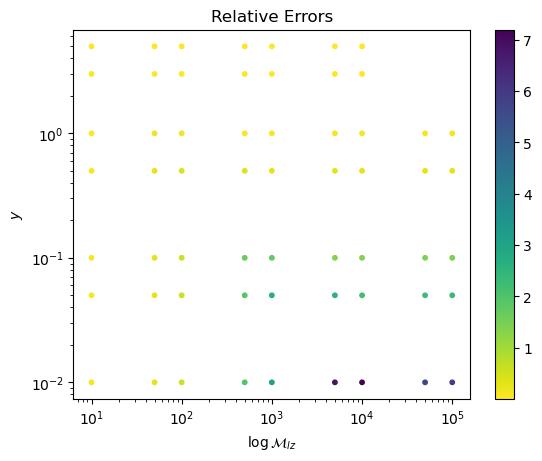

In [37]:
import matplotlib.pyplot as plt

map = plt.cm.get_cmap('viridis')
reversed_map= map.reversed(map) 
plot = plt.scatter(samples[:, 0], samples[:, 1], c=abs_err, cmap=reversed_map,  s=10)
plt.xlabel(r'$\log \mathcal{M}_{lz}$')
plt.ylabel(r'$y$')
plt.xscale('log')
plt.yscale('log')
# ticks_list = []
cbar = plt.colorbar(plot)
# cbar.set_ticklabels(list(map(str, ticks_list)))
plt.title('Relative Errors')
plt.savefig('Abs_Errors in eta.png',dpi=300, bbox_inches='tight')
plt.show()

In [43]:
fs = net.detectors[0].f # returns the truncated frequency array tto the range dictated by the given detector’s PSD
ws = lgw.w_of_f(fs, ml=10000) #Converts a dimensionful frequency (f) to the dimensionless frequency (w)
Fws = lgw.point_Fw_eff_map(ws,0.01)
h_l = h_ul*Fws
#print(len(h_l))
snr_ul=snr_mod.snr_freq_array(h_ul,net.detectors[2].psd,fs)
snr_l =snr_mod.snr_freq_array(h_l,net.detectors[2].psd,fs)
print(snr_l/snr_ul)

11.084436511156072


### Systematic error propogation for spin parameters

In [57]:
delta_eta_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,9):
      
           error += cov_matrix[1,j]* sep_inner_product[i][j]
    delta_eta_list.append(error)

print(len(delta_eta_list))
eta_err=np.abs(delta_eta_list)
print(eta_err)

59
[1.01005824e-02 1.00969771e-02 1.00857030e-02 9.72503810e-03
 8.60263102e-03 1.36717923e-03 1.21650088e-03 4.65274452e-02
 4.63610627e-02 4.58420098e-02 2.99955107e-02 8.42509242e-03
 2.12416571e-03 4.60257762e-04 7.58293298e-02 7.48891941e-02
 7.19733251e-02 4.19563885e-03 5.00343866e-03 1.69443495e-03
 1.71578258e-04 1.84927301e-01 1.34843657e-01 6.87340847e-03
 1.59075090e-02 2.11505838e-06 2.04266441e-04 1.40327159e-05
 2.57022084e-01 1.44725298e-02 1.59203886e-02 9.81711767e-04
 2.73986593e-03 3.01466565e-04 2.65730052e-05 4.68068665e-02
 4.91906613e-02 1.74433741e-02 4.70006494e-03 7.44074192e-05
 1.91379064e-04 9.72747551e-05 2.90887259e-02 3.18624946e-02
 2.74532554e-02 3.46412237e-03 1.79783884e-03 5.18799446e-04
 1.21887784e-04 9.43712586e-02 3.57074319e-02 2.23601495e-02
 4.03022926e-03 7.27114535e-04 1.09441938e-01 3.65856525e-02
 2.29337716e-02 5.69672831e-03 3.93275573e-03]


In [58]:
delta_chi1_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,9):
      
           error += cov_matrix[2,j]* sep_inner_product[i][j]
    delta_chi1_list.append(error)

print(len(delta_chi1_list))
chi1_err=np.abs(delta_chi1_list)
print(chi1_err)


59
[8.52319234e-02 8.51539577e-02 8.49114474e-02 7.72028625e-02
 5.36014812e-02 1.17486362e-01 2.81049243e-02 3.80150552e-01
 3.76485377e-01 3.65061831e-01 2.04291554e-02 7.06901300e-01
 4.47203987e-02 3.62420242e-02 4.56765457e-01 4.35870126e-01
 3.71098004e-01 1.25785878e+00 4.64117958e-01 2.89304199e-02
 3.76625171e-02 4.48564848e-01 1.56546177e+00 4.42051847e+00
 5.56990019e-01 3.93042120e-01 5.29479477e-02 6.27597850e-03
 1.40926874e+00 6.83477068e+00 6.20985693e+00 2.79614849e-01
 3.49888860e-01 5.56444218e-02 6.87270247e-03 1.69477995e+01
 2.08936928e+00 1.46806223e+00 5.49833763e-01 3.49996378e-01
 4.67205137e-03 8.00359830e-03 2.54421806e+01 3.10427557e+00
 2.74545974e+00 6.38134065e-01 1.30897207e-01 4.26267220e-02
 1.34077786e-02 1.02551808e+01 4.39553137e+00 2.47890752e+00
 5.79092580e-01 2.39061745e-01 1.03464805e+01 4.02785928e+00
 2.46373482e+00 4.19963611e-01 1.08934320e-01]


In [59]:
delta_tilt1_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,9):
      
           error += cov_matrix[3,j]* sep_inner_product[i][j]
    delta_tilt1_list.append(error)

print(len(delta_tilt1_list))
tilt1_err=np.abs(delta_tilt1_list)
print(max(tilt1_err))

59
1.4295486334225616


In [56]:
delta_chi2_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,9):
      
           error += cov_matrix[4,j]* sep_inner_product[i][j]
    delta_chi2_list.append(error)

print(len(delta_chi2_list))
chi2_err=np.abs(delta_chi2_list)
print(chi2_err)


59
[2.60061671e-02 2.59432251e-02 2.57422159e-02 1.92826478e-02
 3.71795519e-04 1.25310868e-01 1.25133026e-02 1.14779082e-01
 1.11680064e-01 1.01996591e-01 1.88754699e-01 7.55246146e-01
 3.53902464e-02 3.82694672e-02 2.16516709e-02 3.87809196e-03
 5.12591630e-02 1.41186258e+00 3.75125851e-01 2.09433769e-02
 3.92791941e-02 1.60755531e+00 2.56031661e+00 4.99756423e+00
 7.52131557e-01 3.93358652e-01 5.57599800e-02 6.45142391e-03
 3.10326674e+00 7.74041905e+00 6.63687186e+00 2.13191177e-01
 3.78907016e-01 6.20353615e-02 7.54936772e-03 1.92470552e+01
 2.58996267e+00 1.89378390e+00 6.49806494e-01 3.95859030e-01
 4.27482393e-03 8.69112379e-03 2.86475347e+01 3.81983064e+00
 3.16157363e+00 7.41131837e-01 1.54639138e-01 4.63574745e-02
 1.45250309e-02 1.22075734e+01 5.13891147e+00 2.90625808e+00
 6.74822911e-01 2.74513594e-01 1.21076023e+01 4.71977567e+00
 2.88659217e+00 5.01882948e-01 1.07838358e-01]


In [63]:
delta_tilt2_list=[]

for i in range (len(sep_inner_product)):
    error =0
    for j in range (0,9):
      
           error += cov_matrix[5,j]* sep_inner_product[i][j]
    delta_tilt2_list.append(error)

print(len(delta_tilt2_list))
tilt2_err=np.abs(delta_tilt2_list)
print(max(tilt2_err))

59
0.8251796180682653


In [51]:
eta = 0.249
chi_1 = 1e-5
chi_2 = 1e-5
tilt_1 = 1e-5
tilt_2 = 1e-5
print(np.sin(tilt_1))

9.999999999833334e-06


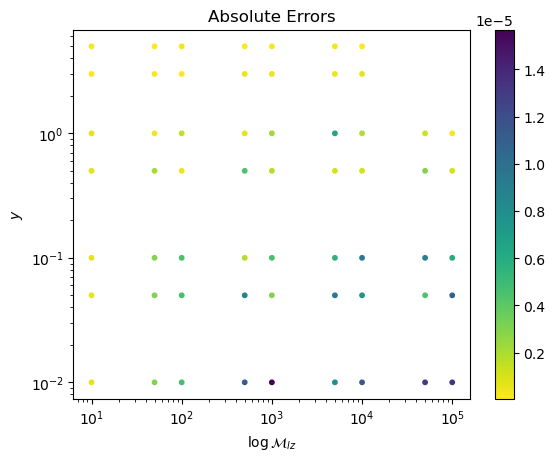

In [53]:
chip_err =chi1_err* np.sin(tilt_1)+ chi_1*np.cos(tilt_1)*tilt1_err
#print(chip_err)
import matplotlib.pyplot as plt

map = plt.cm.get_cmap('viridis')
reversed_map= map.reversed(map) 
plot = plt.scatter(samples[:, 0], samples[:, 1], c=chip_err, cmap=reversed_map,  s=10)
plt.xlabel(r'$\log \mathcal{M}_{lz}$')
plt.ylabel(r'$y$')
plt.xscale('log')
plt.yscale('log')
# ticks_list = []
cbar = plt.colorbar(plot)
# cbar.set_ticklabels(list(map(str, ticks_list)))
plt.title('Absolute Errors')
plt.savefig('Abs_Errors in chip.png',dpi=300, bbox_inches='tight')
plt.show()

In [66]:
chi_eff_err =1/2 * (1+np.sqrt(1-4*eta))*np.cos(tilt_1)*chi1_err+1/(np.sqrt(1-4*eta))*(chi_2*np.cos(tilt_2)-chi_1*np.cos(tilt_1))*eta_err- 1/2 * (1+np.sqrt(1-4*eta))*np.sin(tilt_1)*chi_1*tilt1_err+1/2*(1-np.sqrt(1-4*eta))*np.cos(tilt_2)*chi2_err- 1/2 * (1-np.sqrt(1-4*eta))*np.sin(tilt_2)*chi_2*tilt2_err
print(len(chi_eff_err))

59


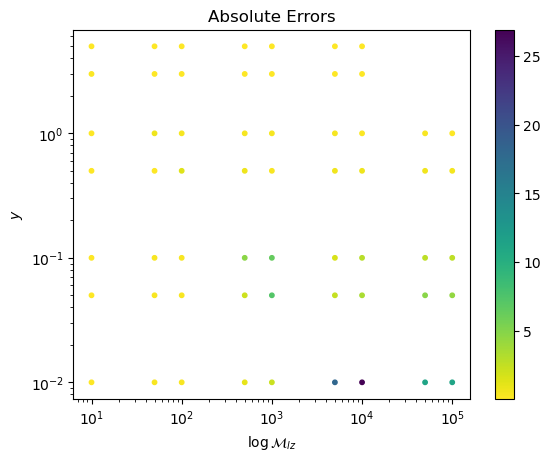

In [67]:
import matplotlib.pyplot as plt

map = plt.cm.get_cmap('viridis')
reversed_map= map.reversed(map) 
plot = plt.scatter(samples[:, 0], samples[:, 1], c=chi_eff_err, cmap=reversed_map,  s=10)
plt.xlabel(r'$\log \mathcal{M}_{lz}$')
plt.ylabel(r'$y$')
plt.xscale('log')
plt.yscale('log')
# ticks_list = []
cbar = plt.colorbar(plot)
# cbar.set_ticklabels(list(map(str, ticks_list)))
plt.title('Absolute Errors')
plt.savefig('Abs_Errors in chieff.png',dpi=300, bbox_inches='tight')
plt.show()